In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [195]:
#PART 1

In [2]:
data = pd.read_csv("Candy_edited.csv")

In [3]:
data.head()

,competitorname,chocolate,fruity,is_chocolate,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,is_pluribus,sugarpercent,pricepercent,winpercent,win_cat
0,100 Grand,1,0,chocolate,1,0,0,1,0,1,0,bar,73.199999,86.000001,66.971725,often
1,3 Musketeers,1,0,chocolate,0,0,1,0,0,1,0,bar,60.399997,51.099998,67.602936,often
2,One dime,0,0,neither,0,0,0,0,0,0,0,neither,1.100000,11.600000,32.261086,sometimes
3,One quarter,0,0,neither,0,0,0,0,0,0,0,neither,1.100000,51.099998,46.116505,sometimes
4,Air Heads,0,1,fruity,0,0,0,0,0,0,0,neither,90.600002,51.099998,52.341465,often


In [4]:
data2 = pd.read_csv("Candy_edited.csv")
data2.shape

(85, 16)

In [5]:
data2 = data2.drop(74)
data2.head(76)

,competitorname,chocolate,fruity,is_chocolate,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,is_pluribus,sugarpercent,pricepercent,winpercent,win_cat
0,100 Grand,1,0,chocolate,1,0,0,1,0,1,0,bar,73.199999,86.000001,66.971725,often
1,3 Musketeers,1,0,chocolate,0,0,1,0,0,1,0,bar,60.399997,51.099998,67.602936,often
2,One dime,0,0,neither,0,0,0,0,0,0,0,neither,1.100000,11.600000,32.261086,sometimes
3,One quarter,0,0,neither,0,0,0,0,0,0,0,neither,1.100000,51.099998,46.116505,sometimes
4,Air Heads,0,1,fruity,0,0,0,0,0,0,0,neither,90.600002,51.099998,52.341465,often
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Sugar Daddy,0,0,neither,1,0,0,0,0,0,0,neither,41.800001,32.499999,32.230995,sometimes
72,Super Bubble,0,1,fruity,0,0,0,0,0,0,0,neither,16.200000,11.600000,27.303865,sometimes
73,Swedish Fish,0,1,fruity,0,0,0,0,0,0,1,pluribus,60.399997,75.500000,54.861111,often
75,Tootsie Roll Juniors,1,0,chocolate,0,0,0,0,0,0,0,neither,31.299999,51.099998,43.068897,sometimes


In [6]:
data2['is_chocolate'] = data2['is_chocolate'].replace(['neither', 'fruity'], 'non-chocolate')
data2.head(76)

,competitorname,chocolate,fruity,is_chocolate,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,is_pluribus,sugarpercent,pricepercent,winpercent,win_cat
0,100 Grand,1,0,chocolate,1,0,0,1,0,1,0,bar,73.199999,86.000001,66.971725,often
1,3 Musketeers,1,0,chocolate,0,0,1,0,0,1,0,bar,60.399997,51.099998,67.602936,often
2,One dime,0,0,non-chocolate,0,0,0,0,0,0,0,neither,1.100000,11.600000,32.261086,sometimes
3,One quarter,0,0,non-chocolate,0,0,0,0,0,0,0,neither,1.100000,51.099998,46.116505,sometimes
4,Air Heads,0,1,non-chocolate,0,0,0,0,0,0,0,neither,90.600002,51.099998,52.341465,often
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Sugar Daddy,0,0,non-chocolate,1,0,0,0,0,0,0,neither,41.800001,32.499999,32.230995,sometimes
72,Super Bubble,0,1,non-chocolate,0,0,0,0,0,0,0,neither,16.200000,11.600000,27.303865,sometimes
73,Swedish Fish,0,1,non-chocolate,0,0,0,0,0,0,1,pluribus,60.399997,75.500000,54.861111,often
75,Tootsie Roll Juniors,1,0,chocolate,0,0,0,0,0,0,0,neither,31.299999,51.099998,43.068897,sometimes


In [7]:
raw_table = pd.crosstab(data2['is_chocolate'], data2['win_cat']).reindex(columns = ['a_lot','often','sometimes', 'rarely'],
                                                        index = ['chocolate','non-chocolate'])
raw_table

win_cat,a_lot,often,sometimes,rarely
is_chocolate,,,,
chocolate,5,23,8,0
non-chocolate,0,11,34,3


In [8]:
table = pd.crosstab(data2['is_chocolate'], data2['win_cat'], normalize = 'index').reindex(columns = ['a_lot','often','sometimes', 'rarely'],
                                                        index = ['chocolate','non-chocolate'])
table

win_cat,a_lot,often,sometimes,rarely
is_chocolate,,,,
chocolate,0.138889,0.638889,0.222222,0.0000
non-chocolate,0.000000,0.229167,0.708333,0.0625


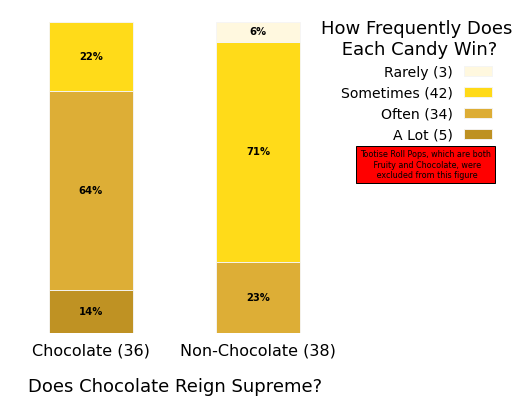

In [9]:
#Add the text! Fix the text!
legend_labels = ['A Lot (5)', 'Often (34)', 'Sometimes (42)', 'Rarely (3)']
ax = table.plot.bar(stacked = True, color = ['darkgoldenrod', 'goldenrod', 'gold', 'cornsilk'] , figsize = [6,6], 
                    rot = 0, fontsize = 16, alpha = 0.9, ec = 'whitesmoke')
[ax.spines[i].set_visible(False) for i in ax.spines]
ax.tick_params(length = 0)
ax.get_yaxis().set_visible(False) 
plt.xlabel('Does Chocolate Reign Supreme?', fontsize = 18, labelpad = 20)
#plt.legend(bbox_to_anchor = [1,1]) #just moving it out of the way
handles,labels = ax.get_legend_handles_labels()
#print(handles,labels)
leg = plt.legend(handles = handles[::-1], labels = legend_labels[::-1], bbox_to_anchor = [0.9, 1], title = 'How Frequently Does\n Each Candy Win?', 
                 title_fontsize = 18, fontsize = 14, markerfirst = False, frameon = False) 
leg.get_title().set_multialignment('center')
plt.text(2, 0.5, 'Tootise Roll Pops, which are both\n Fruity and Chocolate, were\n excluded from this figure', fontsize = 8, horizontalalignment = 'center', bbox = dict(facecolor = 'red'))
for i in range(len(ax.patches)):
    x,y,width,height = ax.patches[i].get_x(), ax.patches[i].get_y(), ax.patches[i].get_width(),\
        ax.patches[i].get_height()
    center_x = x + width/2
    center_y = y + height/2
    if i != 6 and i != 1:
        label = f'{height*100:.0f}%'
        color = 'black'
        plt.text(center_x, center_y, label, ha = 'center', va = 'center', color = color, weight = 'bold')
#Clarify in the x-axis labels
sums = raw_table.sum(axis = 1)#fill in
x_labels = "Chocolate (36)", "Non-Chocolate (38)" #[sums.index[i] + '\n(n=' + str(sums[i]) + ')' for i in range(len(sums))]
plt.xticks([0,1], labels = x_labels)
plt.tick_params(pad = 10)

plt.savefig('stackedbar.png', bbox_inches = 'tight', facecolor = 'white') #leave off face_color for transparency
plt.show()

In [ ]:
#PART 2

In [10]:
data['is_chocolate'] = data['is_chocolate'].replace(['neither', 'fruity', 'both'], 'non-chocolate')
data.head()

,competitorname,chocolate,fruity,is_chocolate,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,is_pluribus,sugarpercent,pricepercent,winpercent,win_cat
0,100 Grand,1,0,chocolate,1,0,0,1,0,1,0,bar,73.199999,86.000001,66.971725,often
1,3 Musketeers,1,0,chocolate,0,0,1,0,0,1,0,bar,60.399997,51.099998,67.602936,often
2,One dime,0,0,non-chocolate,0,0,0,0,0,0,0,neither,1.100000,11.600000,32.261086,sometimes
3,One quarter,0,0,non-chocolate,0,0,0,0,0,0,0,neither,1.100000,51.099998,46.116505,sometimes
4,Air Heads,0,1,non-chocolate,0,0,0,0,0,0,0,neither,90.600002,51.099998,52.341465,often


In [11]:
choc_win = data[data['is_chocolate'] == 'chocolate']
choc_win = choc_win['winpercent']

In [12]:
choc_price = data[data['is_chocolate'] == 'chocolate']
choc_price = choc_price['pricepercent']

In [13]:
nonchoc_win = data[data['is_chocolate'] == 'non-chocolate']
nonchoc_win = nonchoc_win['winpercent']

In [14]:
nonchoc_price = data[data['is_chocolate'] == 'non-chocolate']
nonchoc_price = nonchoc_price['pricepercent']

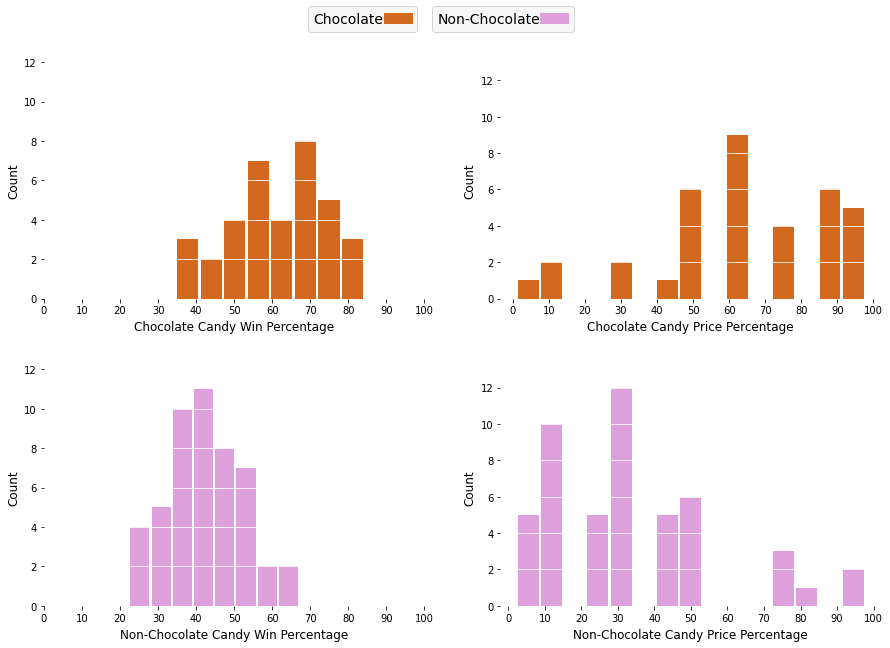

In [17]:
f, ax_hist = plt.subplots(2, 2, figsize = (15,10), gridspec_kw = {'wspace':0.2, 'hspace':0.3})

ax_hist[0, 0].hist(choc_win, bins = 8, rwidth = 0.9, color = 'chocolate')
ax_hist[0, 0].set_xlabel('Chocolate Candy Win Percentage', fontsize = 12, labelpad = 5)
ax_hist[0, 0].set_ylabel('Count', fontsize = 12)
ax_hist[0, 0].set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
ax_hist[0, 0].set_ylim([0, 12])
[ax_hist[0, 0].spines[i].set_visible(False) for i in ax_hist[0, 0].spines]
ax_hist[0, 0].grid(axis = 'y',color= 'white')
labelshist = ['Chocolate']
ax_hist[0, 0].legend(fontsize = 14, markerfirst = False, ncol = 3, bbox_to_anchor = [0.42,0.94],
                       markerscale = 1.5, handletextpad = 0, facecolor = 'whitesmoke',
                       bbox_transform = f.transFigure, loc = 'center', labels = labelshist)
leg = ax_hist[0, 0].get_legend()
leg.legendHandles[0].set_color('chocolate')

ax_hist[0, 1].hist(choc_price, bins = 15, rwidth = 0.9, color = 'chocolate')
ax_hist[0, 1].set_xlabel('Chocolate Candy Price Percentage', fontsize = 12, labelpad = 5)
ax_hist[0, 1].set_ylabel('Count', fontsize = 12)
ax_hist[0, 1].set_ylim([0, 13])
[ax_hist[0, 1].spines[i].set_visible(False) for i in ax_hist[0, 1].spines]
ax_hist[0, 1].grid(axis = 'y',color= 'white')
ax_hist[0, 1].set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

ax_hist[1, 0].hist(nonchoc_win, bins = 8, rwidth = 0.9, color = 'plum')
ax_hist[1, 0].set_xlabel('Non-Chocolate Candy Win Percentage', fontsize = 12, labelpad = 5)
ax_hist[1, 0].set_ylabel('Count', fontsize = 12)
ax_hist[1, 0].set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
ax_hist[1, 0].set_ylim([0, 12])
[ax_hist[1, 0].spines[i].set_visible(False) for i in ax_hist[1, 0].spines]
ax_hist[1, 0].grid(axis = 'y',color= 'white')
labelshist = ['Non-Chocolate']
ax_hist[1, 0].legend(fontsize = 14, markerfirst = False, ncol = 3, bbox_to_anchor = [0.55,0.94],
                       markerscale = 1.5, handletextpad = 0, facecolor = 'whitesmoke',
                       bbox_transform = f.transFigure, loc = 'center', labels = labelshist)
leg = ax_hist[1, 0].get_legend()
leg.legendHandles[0].set_color('plum')
#leg.legendHandles[1].set_color('plum')

ax_hist[1, 1].hist(nonchoc_price, bins = 15, rwidth = 0.9, color = 'plum')
ax_hist[1, 1].set_xlabel('Non-Chocolate Candy Price Percentage', fontsize = 12, labelpad = 5)
ax_hist[1, 1].set_ylabel('Count', fontsize = 12)
ax_hist[1, 1].set_ylim([0, 13])
[ax_hist[1, 1].spines[i].set_visible(False) for i in ax_hist[1, 1].spines]
ax_hist[1, 1].grid(axis = 'y',color= 'white')
ax_hist[1, 1].set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

plt.savefig('histograms.png', bbox_inches = 'tight', facecolor = 'white') #leave off face_color for transparency
plt.show()

In [16]:
#PART 3 OPTION 2

In [18]:
import seaborn as sns

In [34]:
data3 = pd.read_csv("Candy_edited.csv")
data3.head()

,competitorname,chocolate,fruity,is_chocolate,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,is_pluribus,sugarpercent,pricepercent,winpercent,win_cat
0,100 Grand,1,0,chocolate,1,0,0,1,0,1,0,bar,73.199999,86.000001,66.971725,often
1,3 Musketeers,1,0,chocolate,0,0,1,0,0,1,0,bar,60.399997,51.099998,67.602936,often
2,One dime,0,0,neither,0,0,0,0,0,0,0,neither,1.100000,11.600000,32.261086,sometimes
3,One quarter,0,0,neither,0,0,0,0,0,0,0,neither,1.100000,51.099998,46.116505,sometimes
4,Air Heads,0,1,fruity,0,0,0,0,0,0,0,neither,90.600002,51.099998,52.341465,often


In [35]:
data3['is_pluribus'] = data3['is_pluribus'].map({'bar': 'Bar', 'neither': 'Neither', 'pluribus': 'Pluribus'})

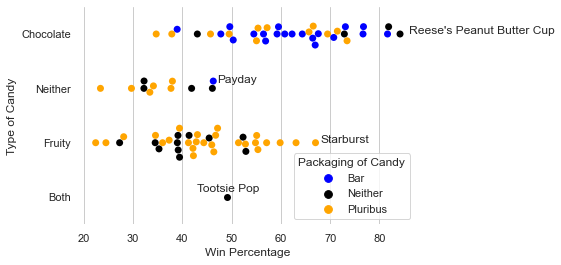

In [40]:
sns.set(style = "whitegrid")
categories = ['Chocolate', 'Neither', 'Fruity', 'Both']
color_palette = {'Bar':'blue', "Pluribus":"orange", 'Neither':'black'}
ax = sns.swarmplot(x = 'winpercent', y = 'is_chocolate', data = data3, hue = 'is_pluribus', palette = color_palette, size = 7)

ax.set(xlabel = 'Win Percentage', ylabel = 'Type of Candy')
ax.set_yticklabels(categories)

ax.legend(loc = 'lower right', title = 'Packaging of Candy')

choc_win = data3[data3['is_chocolate'] == 'chocolate']
num = choc_win['winpercent'].max()
top = choc_win[choc_win['winpercent'] == choc_win['winpercent'].max()]
#print(top) Reese's Peanut Butter Cup

fruity_win = data3[data3['is_chocolate'] == 'fruity']
num = fruity_win['winpercent'].max()
top = fruity_win[fruity_win['winpercent'] == fruity_win['winpercent'].max()]
#print(top) Starburst

neither_win = data3[data3['is_chocolate'] == 'neither']
num = neither_win['winpercent'].max()
top = neither_win[neither_win['winpercent'] == neither_win['winpercent'].max()]
#print(top) Payday

#top for both is tootsie roll

plt.text(s = 'Reese\'s Peanut Butter Cup',x = 86, y = 0)
plt.text(s = 'Payday', x = 47, y = 0.9)
plt.text(s = 'Starburst', x = 68, y = 2)
plt.text(s = 'Tootsie Pop', x = 43, y = 2.9)

[ax.spines[i].set_visible(False) for i in ax.spines]

plt.savefig('swarmplot.png', bbox_inches = 'tight', facecolor = 'white') #leave off face_color for transparency
plt.show()